In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from mpl_toolkits import mplot3d

import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('kahuna.csv')
data.head()

Entity  Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
0  Albania  1991  17.613636        4228256                 1.2889   
1  Albania  1995  16.789055        2066496                 0.6638   
2  Albania  1996  16.588451        1993216                 0.6432   
3  Albania  1997  15.081361        1531552                 0.4941   
4  Albania  1998  15.965796        1744064                 0.5607   

   Food Emissions  Total GHG  Consumption of Ozone  Shared CO2 Emissions  \
0       4011691.0  9030000.0                   0.0                  0.02   
1       4861321.1  7480000.0                  43.4                  0.01   
2       4569702.9  7280000.0                  43.2                  0.01   
3       4431656.7  6510000.0                  45.2                  0.01   
4       4344061.6  6810000.0                  49.6                  0.01   

   Transport  ...  Death_under5  Death_5-14  Death_50-69   Death_70+  \
0   500000.0  ...    172.433312    5.975427   271.661092  512.126572   
1   600000.0  ...    127.035936    4.580403   240.740486  469.406670   
2   600000.0  ...    113.537473    4.373679   255.560407  491.357876   
3   500000.0  ...    105.434149    4.414006   269.448518  521.197486   
4   700000.0  ...     99.530736    4.493629   280.472022  547.315668   

   Death_15-49  Urban%  Child Mortality  Population          GDP  Forest area  
0    60.714220  36.700             3.93  119.225912  3496.580246     786850.0  
1    49.692924  38.911             3.39  116.342482  4471.871070     779050.0  
2    52.069689  39.473             3.26  115.621642  4909.228105     777100.0  
3    57.988035  40.035             3.13  114.900766  4400.577827     775150.0  
4    64.973478  40.601             2.99  114.179927  4819.387534     773200.0  

[5 rows x 26 columns]

------------------

In [3]:
X = data.drop(columns=['Entity', 'Year'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [5]:
km.cluster_centers_

array([[-2.43133886e-02, -1.41366346e-01, -1.28998926e-02,
        -1.17849822e-01, -1.39080810e-01, -8.89218657e-02,
        -1.44117526e-01, -1.18105302e-01, -7.40657806e-02,
        -1.02381540e-02, -3.75228968e-03, -1.42104572e-01,
        -1.34154277e-01, -1.34532895e-01, -1.16535450e-01,
        -1.19161320e-01, -1.37200410e-01, -1.27345929e-01,
        -1.34642371e-01,  1.33002754e-02,  1.28543106e-03,
         2.12885687e-04, -5.31887868e-03, -4.35150122e-02],
       [ 1.91682753e+00,  3.56771667e+00, -3.86958847e-01,
         3.84629760e+00,  3.73517323e+00,  2.57692302e+00,
         3.51710389e+00,  1.05166117e+00,  3.55065608e+00,
         9.20043881e-01,  6.22789388e-01,  6.58944746e+00,
         6.25171489e+00,  6.66693936e+00,  5.74943553e+00,
         5.90793892e+00,  6.42096187e+00,  5.84936697e+00,
         6.39544028e+00, -1.14611534e+00,  3.50392767e-01,
         1.08683148e-01, -6.59684491e-01,  8.41459294e-01],
       [-1.46613885e+00,  6.63011457e+00,  2.03004474e

In [6]:
data['cluster'] = km.labels_
data.head()

Entity  Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
0  Albania  1991  17.613636        4228256                 1.2889   
1  Albania  1995  16.789055        2066496                 0.6638   
2  Albania  1996  16.588451        1993216                 0.6432   
3  Albania  1997  15.081361        1531552                 0.4941   
4  Albania  1998  15.965796        1744064                 0.5607   

   Food Emissions  Total GHG  Consumption of Ozone  Shared CO2 Emissions  \
0       4011691.0  9030000.0                   0.0                  0.02   
1       4861321.1  7480000.0                  43.4                  0.01   
2       4569702.9  7280000.0                  43.2                  0.01   
3       4431656.7  6510000.0                  45.2                  0.01   
4       4344061.6  6810000.0                  49.6                  0.01   

   Transport  ...  Death_5-14  Death_50-69   Death_70+  Death_15-49  Urban%  \
0   500000.0  ...    5.975427   271.661092  512.126572    60.714220  36.700   
1   600000.0  ...    4.580403   240.740486  469.406670    49.692924  38.911   
2   600000.0  ...    4.373679   255.560407  491.357876    52.069689  39.473   
3   500000.0  ...    4.414006   269.448518  521.197486    57.988035  40.035   
4   700000.0  ...    4.493629   280.472022  547.315668    64.973478  40.601   

   Child Mortality  Population          GDP  Forest area  cluster  
0             3.93  119.225912  3496.580246     786850.0        0  
1             3.39  116.342482  4471.871070     779050.0        0  
2             3.26  115.621642  4909.228105     777100.0        0  
3             3.13  114.900766  4400.577827     775150.0        0  
4             2.99  114.179927  4819.387534     773200.0        0  

[5 rows x 27 columns]

In [7]:
#np.set_printoptions(suppress=True)
data.groupby('cluster').mean()

Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
cluster                                                                 
0        2002.239623  10.696644   1.028777e+08               5.169476   
1        2001.500000  19.831352   3.149207e+09               2.463833   
2        2001.500000   3.911636   5.664404e+09              19.946500   

         Food Emissions     Total GHG  Consumption of Ozone  \
cluster                                                       
0          1.029963e+08  1.954523e+08           1187.150385   
1          1.432680e+09  3.915459e+09          35517.383542   
2          1.411459e+09  6.159870e+09          47467.956667   

         Shared CO2 Emissions     Transport  Death_rate_ambient_ozone_pol  \
cluster                                                                     
0                    0.370834  2.030077e+07                      2.304762   
1                   10.933333  2.191417e+08                     16.213795   
2                   20.979167  1.637742e+09                      3.014308   

         ...  Death_under5   Death_5-14    Death_50-69      Death_70+  \
cluster  ...                                                            
0        ...   1316.641978    34.250999    3641.860907    4986.685312   
1        ...  60912.311895  1765.129307  228012.691542  411923.571069   
2        ...    964.143942     7.433022   26056.717104   61425.546122   

          Death_15-49     Urban%  Child Mortality  Population           GDP  \
cluster                                                                       
0         1079.753765  58.066736         4.473239  180.855579  15806.941359   
1        56154.186658  33.544688         5.998958  249.008456   3911.556322   
2         4913.515424  78.874792         0.857917   31.123859  49302.893297   

          Forest area  
cluster                
0        3.098597e+07  
1        1.243952e+08  
2        3.051919e+08  

[3 rows x 25 columns]

In [8]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=data.columns.drop(['Entity', 'cluster', 'Year'])
)
centroids

Deaths %  CO2 Emissions  CO2 Emissions Per Cap  Food Emissions  \
0  10.696644   1.028777e+08               5.169476    1.029963e+08   
1  19.831352   3.149207e+09               2.463833    1.432680e+09   
2   3.911636   5.664404e+09              19.946500    1.411459e+09   

      Total GHG  Consumption of Ozone  Shared CO2 Emissions     Transport  \
0  1.954523e+08           1187.150385              0.370834  2.030077e+07   
1  3.915459e+09          35517.383542             10.933333  2.191417e+08   
2  6.159870e+09          47467.956667             20.979167  1.637742e+09   

   Death_rate_ambient_ozone_pol  Death_rate_household_air_pol  ...  \
0                      2.304762                     62.468660  ...   
1                     16.213795                    132.159339  ...   
2                      3.014308                      0.072509  ...   

   Death_under5   Death_5-14    Death_50-69      Death_70+   Death_15-49  \
0   1316.641978    34.250999    3641.860907    4986.685312   1079.753765   
1  60912.311895  1765.129307  228012.691542  411923.571069  56154.186658   
2    964.143942     7.433022   26056.717104   61425.546122   4913.515424   

      Urban%  Child Mortality  Population           GDP   Forest area  
0  58.066736         4.473239  180.855579  15806.941359  3.098597e+07  
1  33.544688         5.998958  249.008456   3911.556322  1.243952e+08  
2  78.874792         0.857917   31.123859  49302.893297  3.051919e+08  

[3 rows x 24 columns]

In [9]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score = pd.DataFrame(scores)
score.columns = ['k', 'inertia', 'silhouette']
score.head()

k       inertia  silhouette
0  2  38563.314328    0.798139
1  3  32001.744490    0.761287
2  4  25712.987016    0.276625
3  5  22522.354270    0.279479
4  6  19631.994177    0.300913

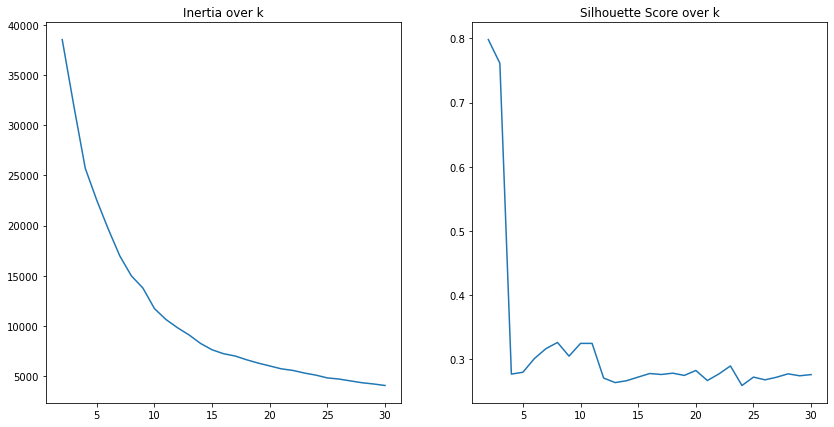

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score.k, score.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score.k, score.silhouette);
axes[1].set_title('Silhouette Score over k');

In [11]:
columns=data.columns.drop(['Entity', 'cluster', 'Year'])
rev_columns = list(columns.astype(str))
rev_columns.reverse()

/Users/kevingates/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


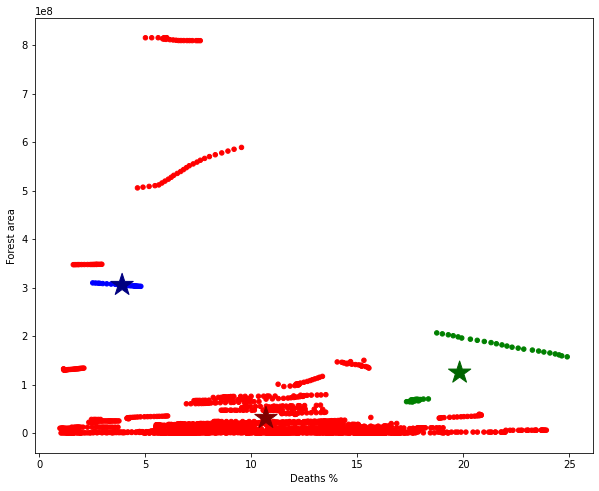

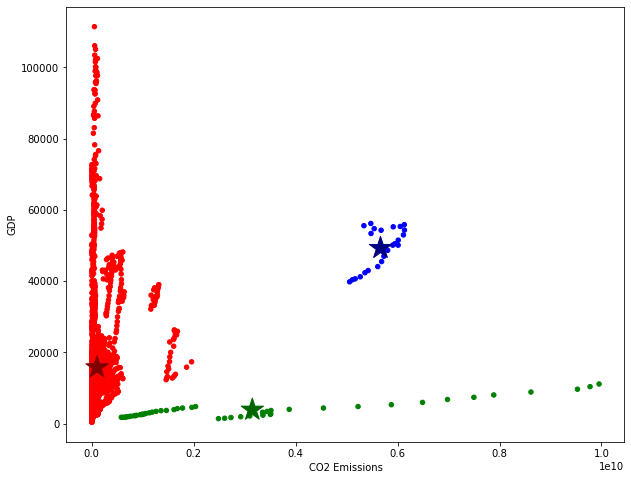

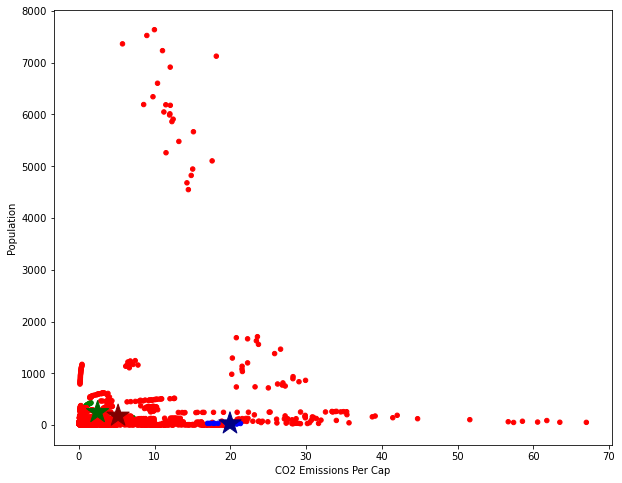

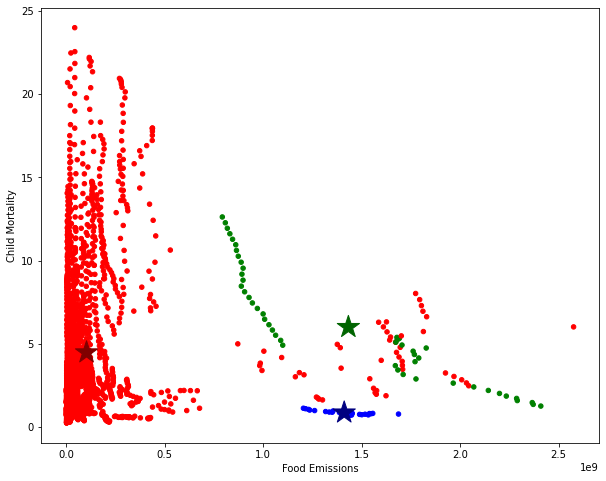

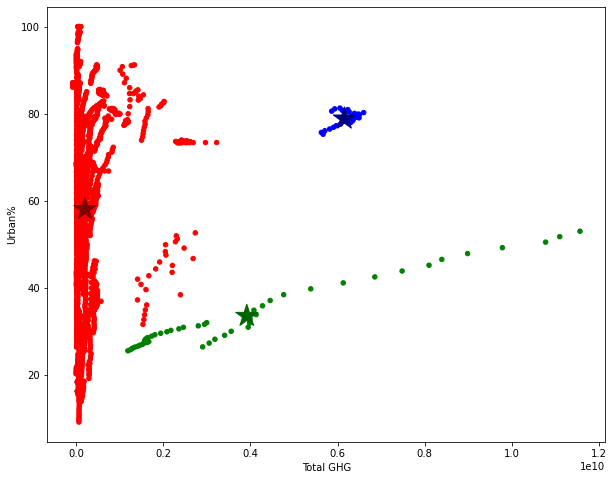

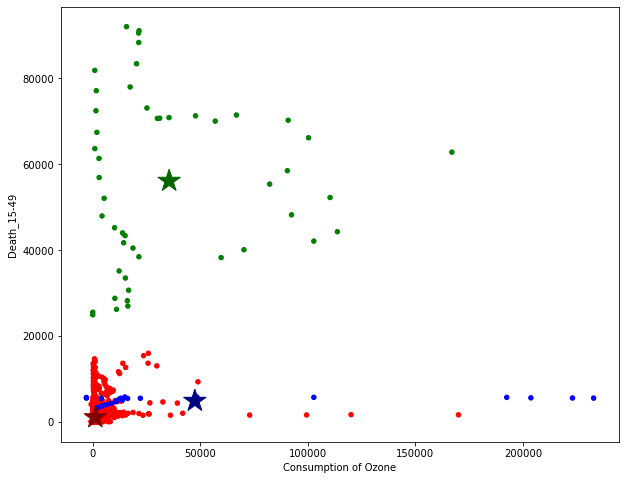

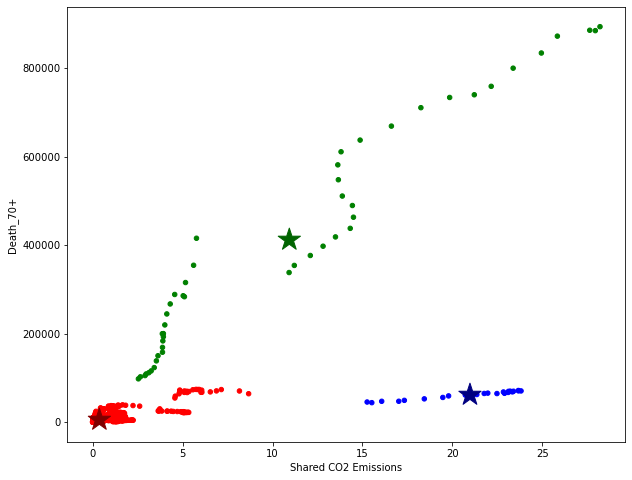

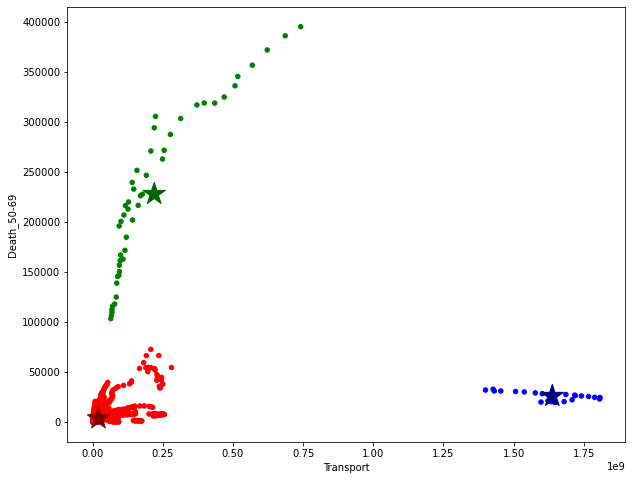

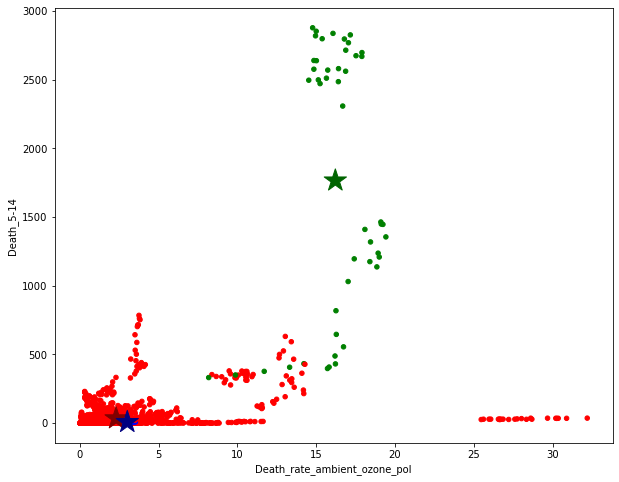

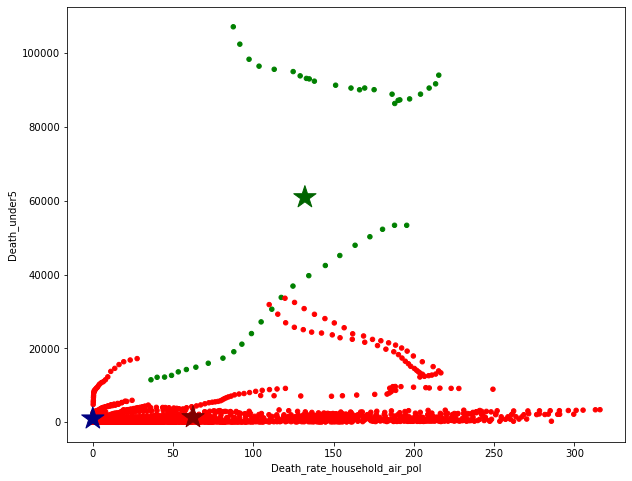

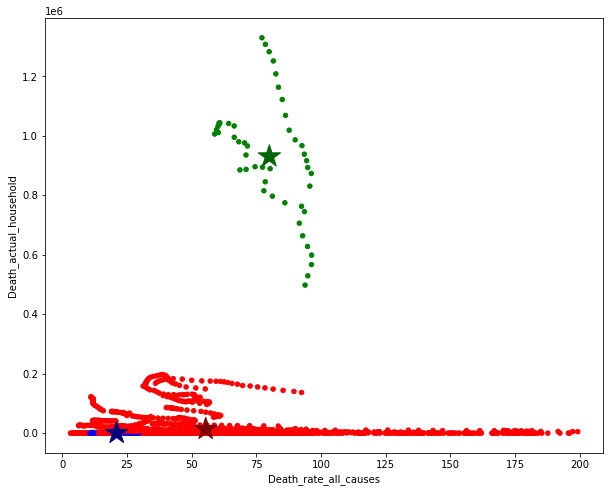

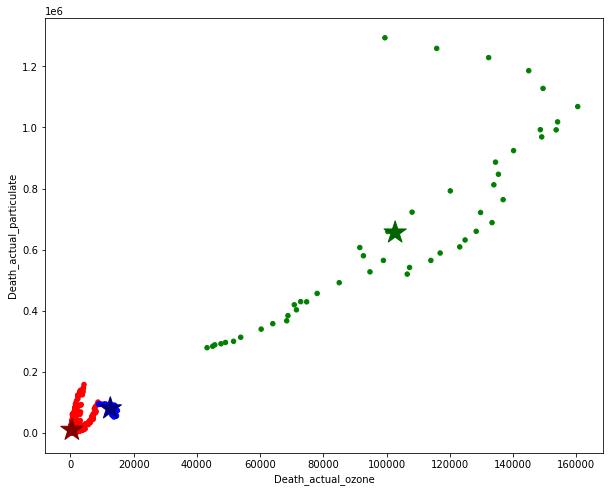

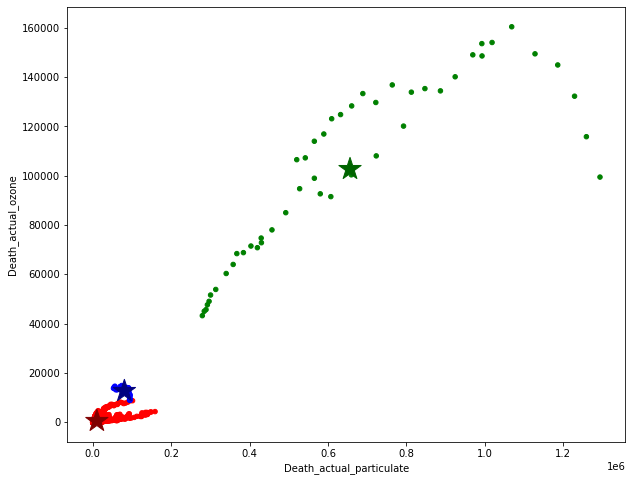

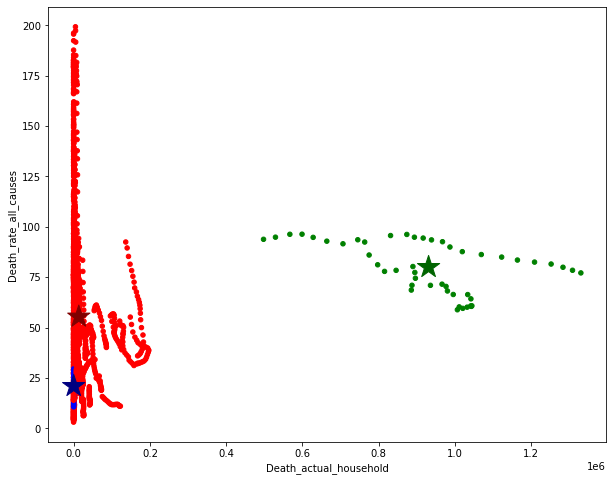

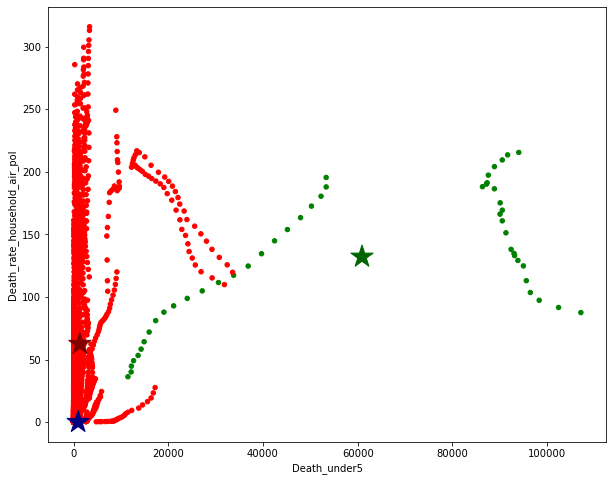

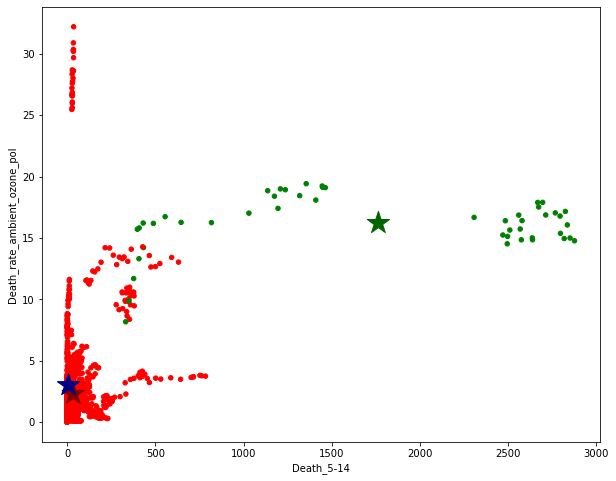

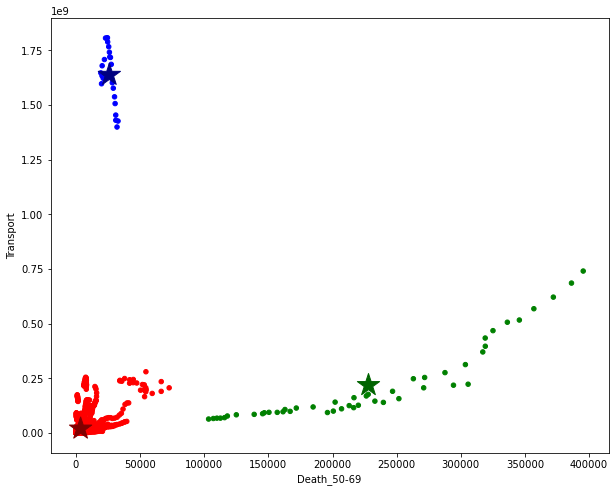

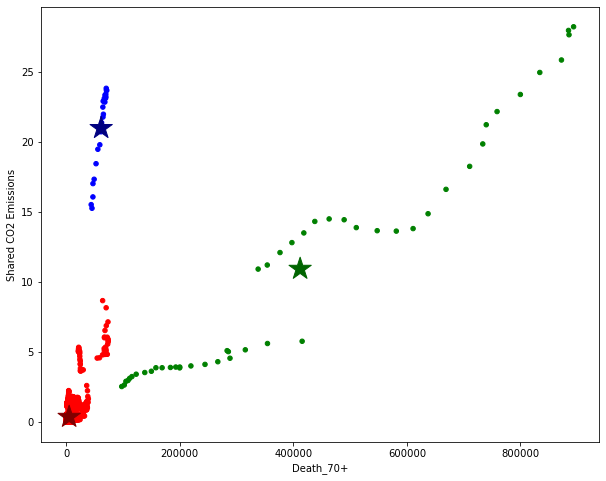

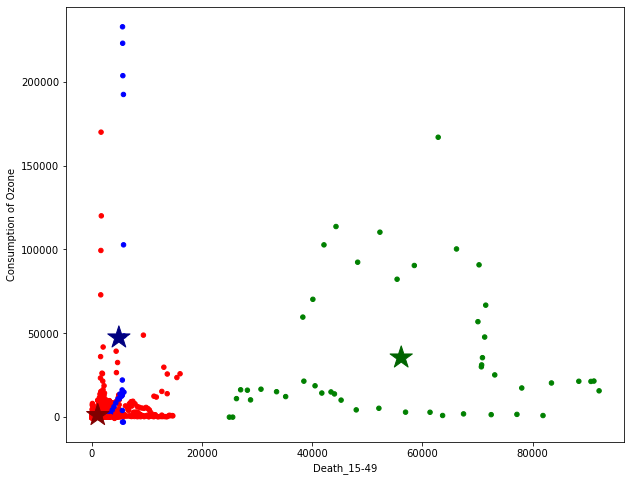

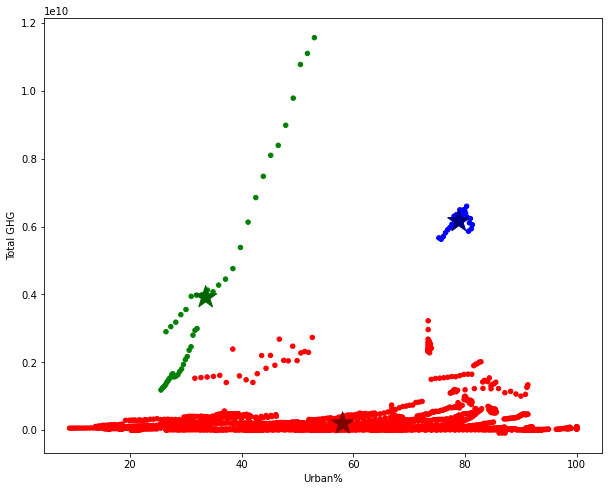

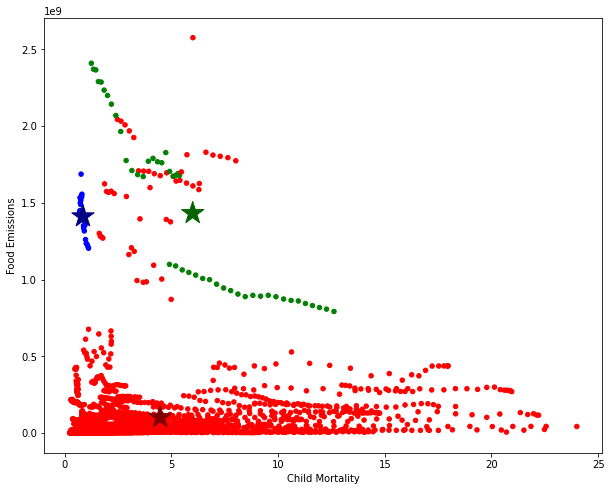

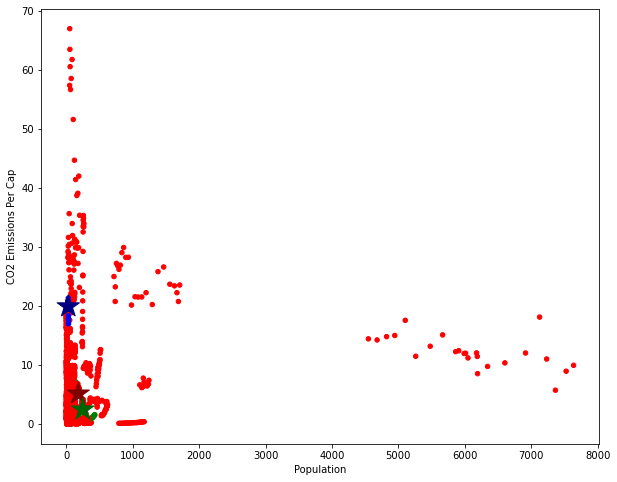

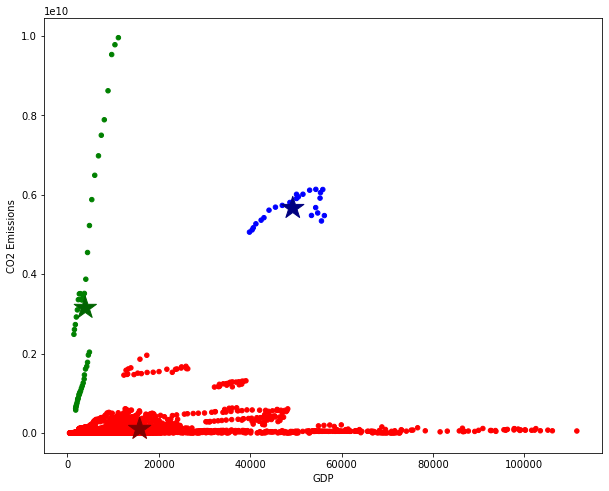

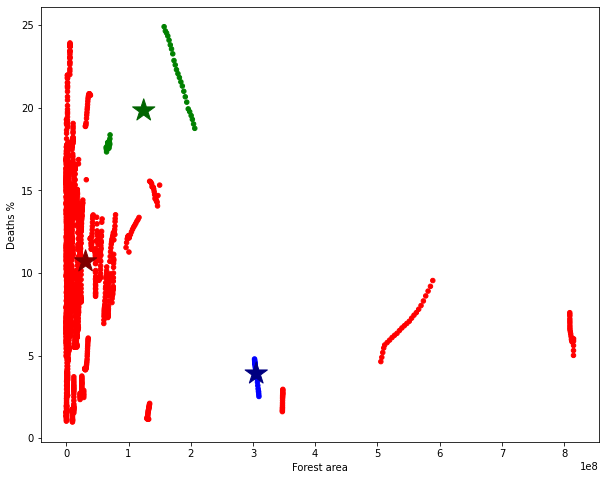

In [12]:
for x, y in zip(columns, rev_columns):
    colors = ["red", "green", "blue"]
    data['color'] = data['cluster'].map(lambda p: colors[p])

    ax = data.plot(    
        kind="scatter", 
        x=x, y=y,
        figsize=(10,8),
        c = data['color']
    )
    centroids.plot(
    kind="scatter", 
    x=x, y=y, 
    marker="*", c=["maroon", "darkgreen", "navy"], s=550,
    ax=ax
    );

----------------------

In [13]:
#making a snapshot of the data
snap = data[['Year','Entity','CO2 Emissions','CO2 Emissions Per Cap','Total GHG','Consumption of Ozone','Urban%','Population','GDP','Forest area','Deaths %','Child Mortality','Death_rate_all_causes','Death_under5','Death_5-14','Death_70+','cluster']]
snap.head()

Year   Entity  CO2 Emissions  CO2 Emissions Per Cap  Total GHG  \
0  1991  Albania        4228256                 1.2889  9030000.0   
1  1995  Albania        2066496                 0.6638  7480000.0   
2  1996  Albania        1993216                 0.6432  7280000.0   
3  1997  Albania        1531552                 0.4941  6510000.0   
4  1998  Albania        1744064                 0.5607  6810000.0   

   Consumption of Ozone  Urban%  Population          GDP  Forest area  \
0                   0.0  36.700  119.225912  3496.580246     786850.0   
1                  43.4  38.911  116.342482  4471.871070     779050.0   
2                  43.2  39.473  115.621642  4909.228105     777100.0   
3                  45.2  40.035  114.900766  4400.577827     775150.0   
4                  49.6  40.601  114.179927  4819.387534     773200.0   

    Deaths %  Child Mortality  Death_rate_all_causes  Death_under5  \
0  17.613636             3.93              46.051505    172.433312   
1  16.789055             3.39              37.768185    127.035936   
2  16.588451             3.26              38.585679    113.537473   
3  15.081361             3.13              39.243796    105.434149   
4  15.965796             2.99              40.057266     99.530736   

   Death_5-14   Death_70+  cluster  
0    5.975427  512.126572        0  
1    4.580403  469.406670        0  
2    4.373679  491.357876        0  
3    4.414006  521.197486        0  
4    4.493629  547.315668        0

In [14]:
#adding a country's commitment to a net zero future

In [15]:
net_zero_binary = pd.read_csv('../../data/dirty_data/net-zero-target-set.csv')
net_zero_binary.head()

Entity Code  Year Is there a net-zero target?
0  Antigua and Barbuda  ATG  2040                         Yes
1            Australia  AUS  2050                         Yes
2              Austria  AUT  2040                         Yes
3              Bahrain  BHR  2060                         Yes
4             Barbados  BRB  2030                         Yes

In [16]:
len(net_zero_binary.Entity.unique())

66

In [17]:
nz_list = net_zero_binary.Entity.unique()

In [18]:
nz=[]
nz_bin=[]
for country in snap.Entity:
    if country in nz_list:
        nz.append('Yes')
        nz_bin.append(1)
    else:
        nz.append('No')
        nz_bin.append(0)


In [19]:
len(nz), len(nz_bin)

(2409, 2409)

In [20]:
snap.shape

(2409, 17)

In [21]:
snap['net_zero'] = nz

/var/folders/t7/10pc37nd7nd77w12vtbk6_5m0000gn/T/ipykernel_22835/1497714533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snap['net_zero'] = nz


In [22]:
snap['net_zero_bin'] = nz_bin

/var/folders/t7/10pc37nd7nd77w12vtbk6_5m0000gn/T/ipykernel_22835/952615607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snap['net_zero_bin'] = nz_bin


In [24]:
snap.head()

Year   Entity  CO2 Emissions  CO2 Emissions Per Cap  Total GHG  \
0  1991  Albania        4228256                 1.2889  9030000.0   
1  1995  Albania        2066496                 0.6638  7480000.0   
2  1996  Albania        1993216                 0.6432  7280000.0   
3  1997  Albania        1531552                 0.4941  6510000.0   
4  1998  Albania        1744064                 0.5607  6810000.0   

   Consumption of Ozone  Urban%  Population          GDP  Forest area  \
0                   0.0  36.700  119.225912  3496.580246     786850.0   
1                  43.4  38.911  116.342482  4471.871070     779050.0   
2                  43.2  39.473  115.621642  4909.228105     777100.0   
3                  45.2  40.035  114.900766  4400.577827     775150.0   
4                  49.6  40.601  114.179927  4819.387534     773200.0   

    Deaths %  Child Mortality  Death_rate_all_causes  Death_under5  \
0  17.613636             3.93              46.051505    172.433312   
1  16.789055             3.39              37.768185    127.035936   
2  16.588451             3.26              38.585679    113.537473   
3  15.081361             3.13              39.243796    105.434149   
4  15.965796             2.99              40.057266     99.530736   

   Death_5-14   Death_70+  cluster net_zero  net_zero_bin  
0    5.975427  512.126572        0       No             0  
1    4.580403  469.406670        0       No             0  
2    4.373679  491.357876        0       No             0  
3    4.414006  521.197486        0       No             0  
4    4.493629  547.315668        0       No             0

In [25]:
snap.net_zero.value_counts()

No     1532
Yes     877
Name: net_zero, dtype: int64

In [26]:
snap.net_zero_bin.value_counts()

0    1532
1     877
Name: net_zero_bin, dtype: int64

In [64]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [103]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
snap.drop(columns=['Year']).groupby(['Entity', 'cluster']).mean()

CO2 Emissions  CO2 Emissions Per Cap     Total GHG  \
Entity     cluster                                                       
Albania    0          3616001.600                  1.186   8673000.000   
Algeria    0        101880830.957                  3.117 140026956.522   
Angola     0         18959183.100                  0.913 176354000.000   
Argentina  0        150264818.500                  3.984 400927500.000   
Armenia    0          4145867.550                  1.393   7356500.000   
...                           ...                    ...           ...   
Uruguay    0          5917661.292                  1.788  15386666.667   
Uzbekistan 0        115503679.667                  4.506 215160952.381   
Vietnam    0         85192578.136                  1.002 148390454.545   
Zambia     0          2579400.400                  0.230 455966000.000   
Zimbabwe   0         11924064.739                  1.000  67426521.739   

                    Consumption of Ozone  Urban%  Population       GDP  \
Entity     cluster                                                       
Albania    0                      28.443  45.722     110.835  7588.821   
Algeria    0                    1124.284  62.128      13.659  9622.430   
Angola     0                      61.114  53.927      15.597  6246.750   
Argentina  0                    3605.673  89.330      13.683 19379.664   
Armenia    0                      84.458  64.198     105.383  6959.846   
...                                  ...     ...         ...       ...   
Uruguay    0                     147.289  92.502      18.852 15578.820   
Uzbekistan 0                      88.336  47.454      60.581  3466.677   
Vietnam    0                     420.894  26.647     261.897  3772.029   
Zambia     0                      28.745  37.692      15.077  2415.007   
Zimbabwe   0                     423.191  32.996      31.246  3132.164   

                    Forest area  Deaths %  Child Mortality  \
Entity     cluster                                           
Albania    0         777494.300    13.945            2.251   
Algeria    0        1736482.609    11.005            3.572   
Angola     0       74973268.800    12.211           16.538   
Argentina  0       32620025.000     4.838            1.962   
Armenia    0         331704.750    12.996            2.543   
...                         ...       ...              ...   
Uruguay    0        1421072.917     3.116            1.563   
Uzbekistan 0        3075036.581    15.526            5.182   
Vietnam    0       12209590.909    15.599            2.879   
Zambia     0       46921448.000    10.058           12.937   
Zimbabwe   0       18229773.043     8.284            8.852   

                    Death_rate_all_causes  Death_under5  Death_5-14  \
Entity     cluster                                                    
Albania    0                       40.990        63.388       3.154   
Algeria    0                       95.676      1413.454      41.018   
Angola     0                       25.649      1236.580      29.515   
Argentina  0                       29.528       346.063       6.034   
Armenia    0                       91.818        72.981       1.959   
...                                   ...           ...         ...   
Uruguay    0                       17.918        17.142       0.151   
Uzbekistan 0                      162.361      2476.389     143.125   
Vietnam    0                       39.473      1178.127      16.772   
Zambia     0                       26.387       730.975      18.630   
Zimbabwe   0                       33.444       653.615       9.241   

                    Death_70+  net_zero_bin  
Entity     cluster                           
Albania    0          709.196         0.000  
Algeria    0         7554.208         0.000  
Angola     0          501.776         0.000  
Argentina  0         6720.933         0.000  
Armenia    0         1742.961         0.000  
...                       ...           .

In [104]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
snap.drop(columns=['Year']).groupby(['Entity', 'cluster']).mean().T

Entity                    Albania       Algeria        Angola     Argentina  \
cluster                         0             0             0             0   
CO2 Emissions         3616001.600 101880830.957  18959183.100 150264818.500   
CO2 Emissions Per Cap       1.186         3.117         0.913         3.984   
Total GHG             8673000.000 140026956.522 176354000.000 400927500.000   
Consumption of Ozone       28.443      1124.284        61.114      3605.673   
Urban%                     45.722        62.128        53.927        89.330   
Population                110.835        13.659        15.597        13.683   
GDP                      7588.821      9622.430      6246.750     19379.664   
Forest area            777494.300   1736482.609  74973268.800  32620025.000   
Deaths %                   13.945        11.005        12.211         4.838   
Child Mortality             2.251         3.572        16.538         1.962   
Death_rate_all_causes      40.990        95.676        25.649        29.528   
Death_under5               63.388      1413.454      1236.580       346.063   
Death_5-14                  3.154        41.018        29.515         6.034   
Death_70+                 709.196      7554.208       501.776      6720.933   
net_zero_bin                0.000         0.000         0.000         0.000   

Entity                    Armenia     Australia      Austria   Azerbaijan  \
cluster                         0             0            0            0   
CO2 Emissions         4145867.550 356715511.720 61961985.800 32052830.944   
CO2 Emissions Per Cap       1.393        17.980        7.912        3.755   
Total GHG             7356500.000 581838000.000 64146000.000 63031666.667   
Consumption of Ozone       84.458      1593.277     1450.660       92.351   
Urban%                     64.198        84.878       62.416       52.439   
Population                105.383         2.586       94.733      102.398   
GDP                      6959.846     39116.972    38497.278     8333.410   
Forest area            331704.750 131691114.000  3788164.000  1009265.828   
Deaths %                   12.996         1.554        6.247       12.295   
Child Mortality             2.543         0.611        0.852        5.747   
Death_rate_all_causes      91.818         7.573       41.309      100.716   
Death_under5               72.981        33.022       24.118      583.262   
Death_5-14                  1.959         0.115        0.295       31.048   
Death_70+                1742.961      1396.696     3704.282     2604.554   
net_zero_bin                0.000         1.000        1.000        0.000   

Entity                     Bahrain    Bangladesh      Belarus        Benin  \
cluster                          0             0            0            0   
CO2 Emissions         19635394.750  33340031.375 61859085.000  2356228.750   
CO2 Emissions Per Cap       24.395         0.247        6.362        0.297   
Total GHG             26818750.000 144742916.667 72179565.217 21549166.667   
Consumption of Ozone       136.780       354.299      239.503       39.333   
Urban%                      88.452        25.286       71.495       39.330   
Population                1112.435       997.465       48.391       64.780   
GDP                      46341.843      2173.386    11500.569     2490.341   
Forest area                392.750   1908753.037  8343595.652  4105983.333   
Deaths %                    16.496        20.501        9.244       15.599   
Child Mortality              1.354         8.458        1.025       13.572   
Death_rate_all_causes      165.442        43.212       88.728       25.089   
Death_under5                10.287      8491.625       47.672      579.969   
Death_5-14                   0.322       341.972        1.103       12.109   
Death_70+                  151.165     13543.224     7036.640      302.427   
net_zero_bin                 1.000         0.000        0.000        1.000   

Entity             

In [73]:
#THIS IS ACTUALLY REMARKABLE, CLUSTER 1 ONLY INCLUDES CHINA AND INDIA AND CLUSTER 2 ONLY INCLUDES THE US!

In [105]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
snap.drop(columns=['Year']).groupby(['cluster', 'Entity']).mean()

CO2 Emissions  CO2 Emissions Per Cap      Total GHG  \
cluster Entity                                                               
0       Albania          3616001.600                  1.186    8673000.000   
        Algeria        101880830.957                  3.117  140026956.522   
        Angola          18959183.100                  0.913  176354000.000   
        Argentina      150264818.500                  3.984  400927500.000   
        Armenia          4145867.550                  1.393    7356500.000   
...                              ...                    ...            ...   
        Zambia           2579400.400                  0.230  455966000.000   
        Zimbabwe        11924064.739                  1.000   67426521.739   
1       China         5171744122.625                  3.915 6012859583.333   
        India         1126670762.917                  1.012 1818057500.000   
2       United States 5664404257.417                 19.947 6159869583.333   

                       Consumption of Ozone  Urban%  Population       GDP  \
cluster Entity                                                              
0       Albania                      28.443  45.722     110.835  7588.821   
        Algeria                    1124.284  62.128      13.659  9622.430   
        Angola                       61.114  53.927      15.597  6246.750   
        Argentina                  3605.673  89.330      13.683 19379.664   
        Armenia                      84.458  64.198     105.383  6959.846   
...                                     ...     ...         ...       ...   
        Zambia                       28.745  37.692      15.077  2415.007   
        Zimbabwe                    423.191  32.996      31.246  3132.164   
1       China                     62125.985  38.684     134.161  4873.012   
        India                      8908.782  28.406     363.856  2950.100   
2       United States             47467.957  78.875      31.124 49302.893   

                        Forest area  Deaths %  Child Mortality  \
cluster Entity                                                   
0       Albania          777494.300    13.945            2.251   
        Algeria         1736482.609    11.005            3.572   
        Angola         74973268.800    12.211           16.538   
        Argentina      32620025.000     4.838            1.962   
        Armenia          331704.750    12.996            2.543   
...                             ...       ...              ...   
        Zambia         46921448.000    10.058           12.937   
        Zimbabwe       18229773.043     8.284            8.852   
1       China         181295317.458    21.914            3.300   
        India          67495141.667    17.749            8.698   
2       United States 305191875.000     3.912            0.858   

                       Death_rate_all_causes  Death_under5  Death_5-14  \
cluster Entity                                                           
0       Albania                       40.990        63.388       3.154   
        Algeria                       95.676      1413.454      41.018   
        Angola                        25.649      1236.580      29.515   
        Argentina                     29.528       346.063       6.034   
        Armenia                       91.818        72.981       1.959   
...                                      ...           ...         ...   
        Zambia                        26.387       730.975      18.630   
        Zimbabwe                      33.444       653.615       9.241   
1       China                         89.696     29231.634     877.914   
        India                         70.346     92592.990    2652.345   
2       United States                 20.981       964.144       7.433   

                       Death_70+  net_zero_bin  
cluster Entity                                  
0       Albania          709.196         0.000  
        Algeria         7554.208     

In [106]:
#Creating Visuals

In [107]:
snap.head()

Year   Entity  CO2 Emissions  CO2 Emissions Per Cap   Total GHG  \
0  1991  Albania        4228256                  1.289 9030000.000   
1  1995  Albania        2066496                  0.664 7480000.000   
2  1996  Albania        1993216                  0.643 7280000.000   
3  1997  Albania        1531552                  0.494 6510000.000   
4  1998  Albania        1744064                  0.561 6810000.000   

   Consumption of Ozone  Urban%  Population      GDP  Forest area  Deaths %  \
0                 0.000  36.700     119.226 3496.580   786850.000    17.614   
1                43.400  38.911     116.342 4471.871   779050.000    16.789   
2                43.200  39.473     115.622 4909.228   777100.000    16.588   
3                45.200  40.035     114.901 4400.578   775150.000    15.081   
4                49.600  40.601     114.180 4819.388   773200.000    15.966   

   Child Mortality  Death_rate_all_causes  Death_under5  Death_5-14  \
0            3.930                 46.052       172.433       5.975   
1            3.390                 37.768       127.036       4.580   
2            3.260                 38.586       113.537       4.374   
3            3.130                 39.244       105.434       4.414   
4            2.990                 40.057        99.531       4.494   

   Death_70+  cluster net_zero  net_zero_bin  
0    512.127        0       No             0  
1    469.407        0       No             0  
2    491.358        0       No             0  
3    521.197        0       No             0  
4    547.316        0       No             0

In [111]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
snap.drop(columns='Year').groupby('cluster').mean().T


cluster                           0              1              2
CO2 Emissions         102877714.826 3149207442.771 5664404257.417
CO2 Emissions Per Cap         5.169          2.464         19.947
Total GHG             195452293.539 3915458541.667 6159869583.333
Consumption of Ozone       1187.150      35517.384      47467.957
Urban%                       58.067         33.545         78.875
Population                  180.856        249.008         31.124
GDP                       15806.941       3911.556      49302.893
Forest area            30985970.730  124395229.562  305191875.000
Deaths %                     10.697         19.831          3.912
Child Mortality               4.473          5.999          0.858
Death_rate_all_causes        55.409         80.021         20.981
Death_under5               1316.642      60912.312        964.144
Death_5-14                   34.251       1765.129          7.433
Death_70+                  4986.685     411923.571      61425.546
net_zero_bin                  0.344          1.000          1.000

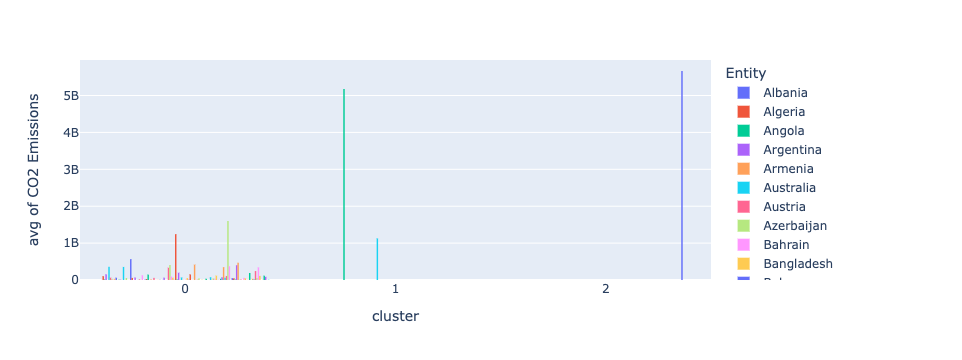

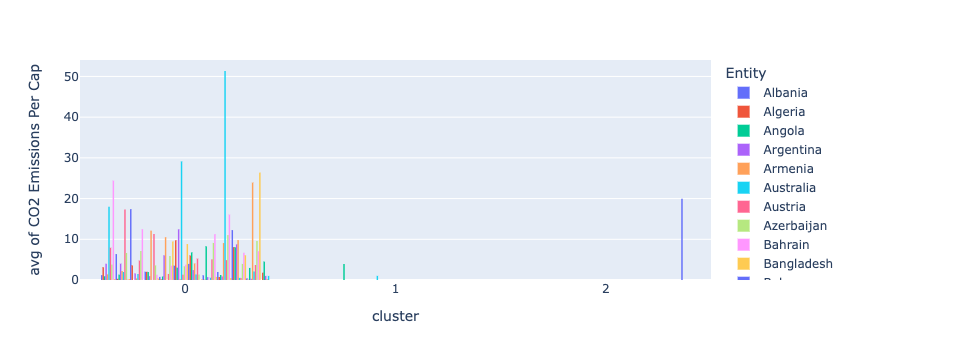

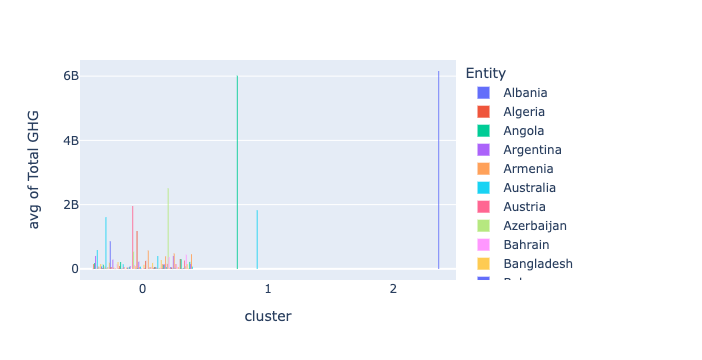

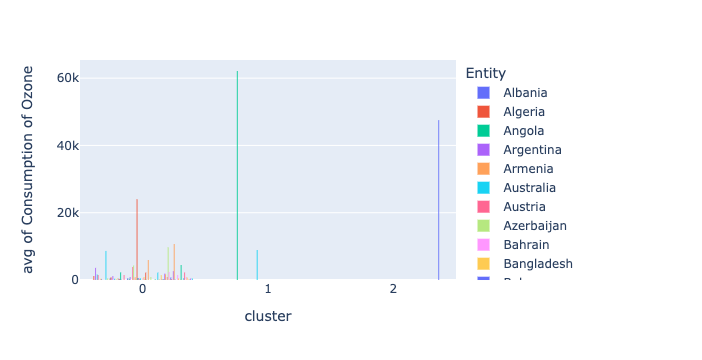

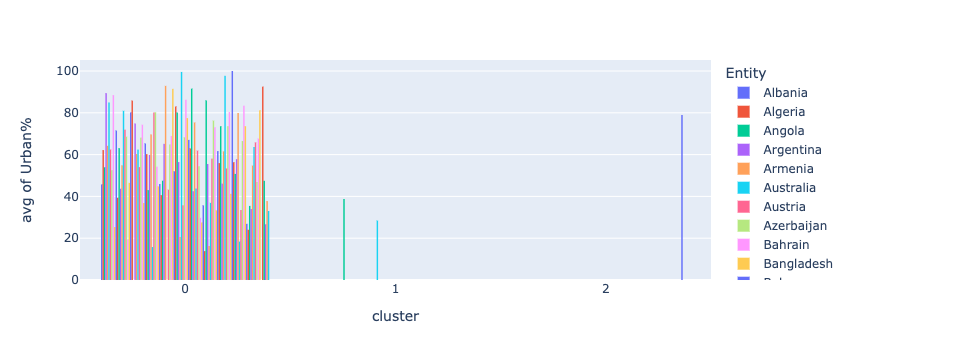

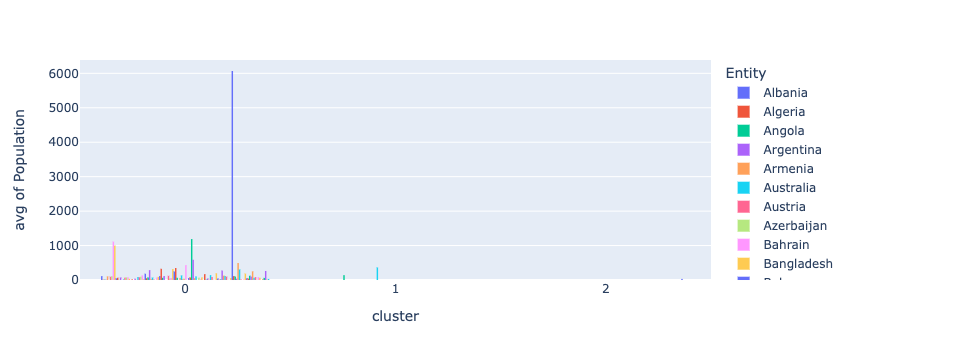

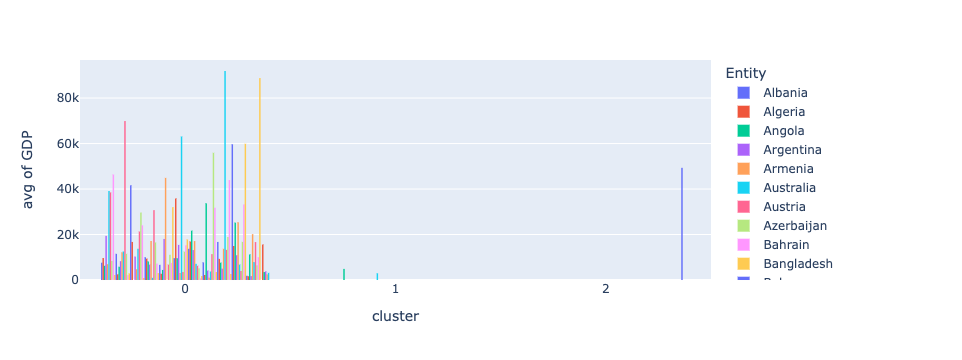

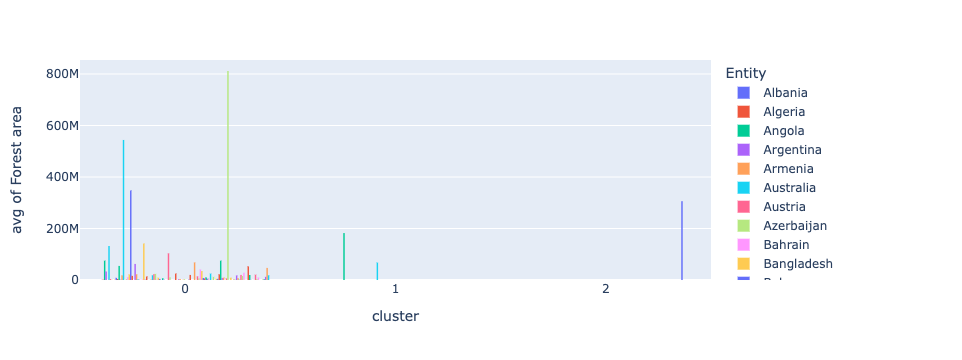

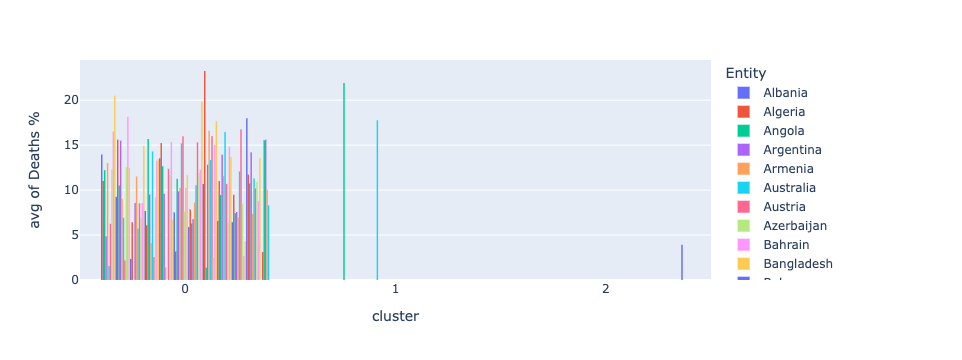

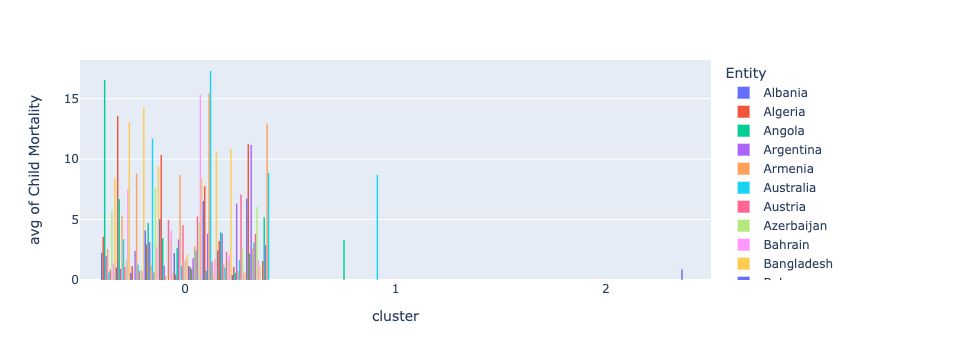

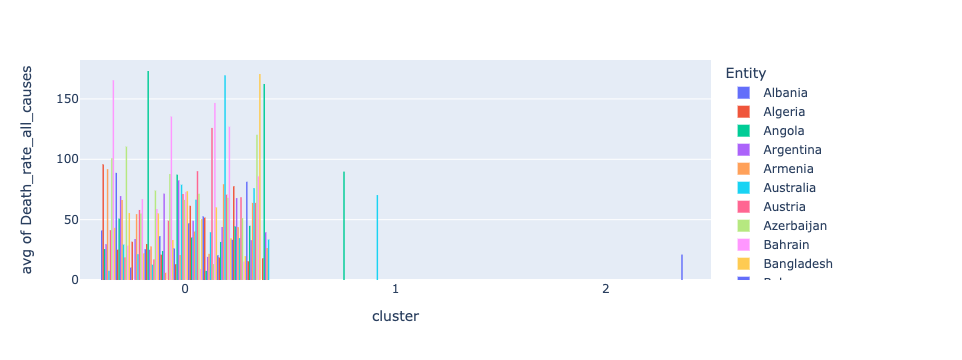

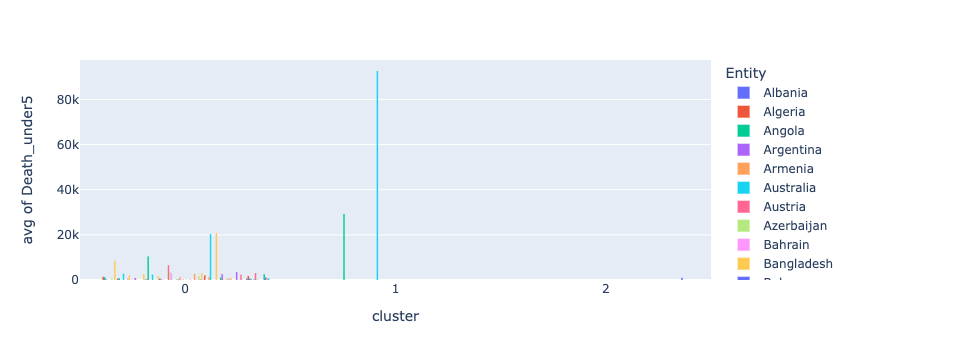

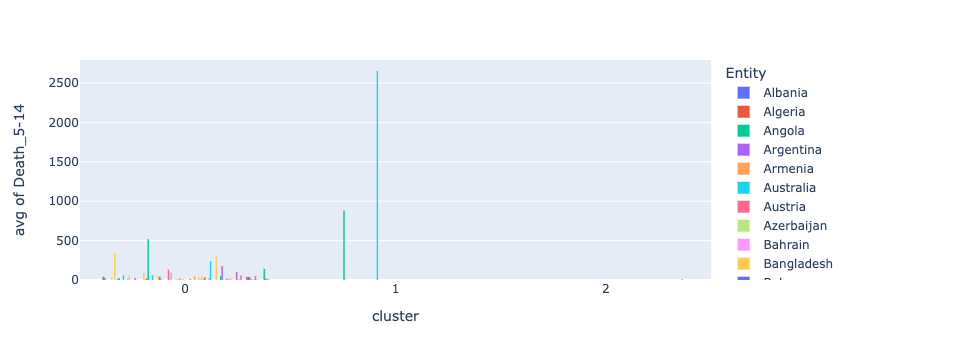

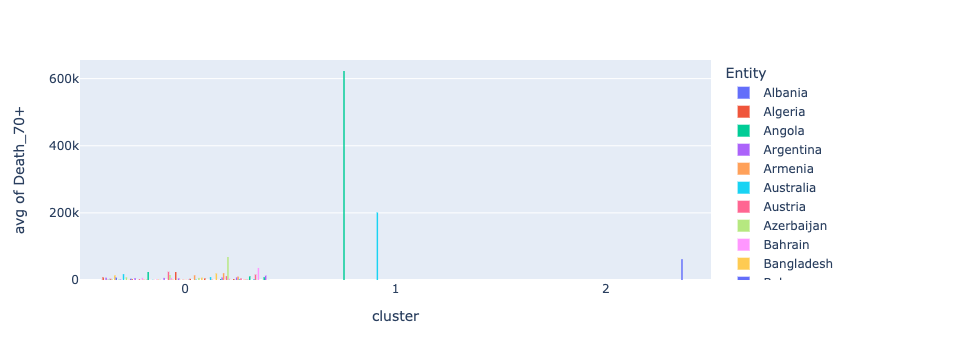

In [140]:
#plot each cluster's mean snap statistics (all) (bar)
stats=['CO2 Emissions','CO2 Emissions Per Cap','Total GHG','Consumption of Ozone','Urban%','Population','GDP','Forest area','Deaths %','Child Mortality','Death_rate_all_causes','Death_under5','Death_5-14','Death_70+']

for stat in stats:
    fig = px.histogram(snap, x='cluster', y=stat, color='Entity', barmode='group', histfunc='avg')
    fig.show()



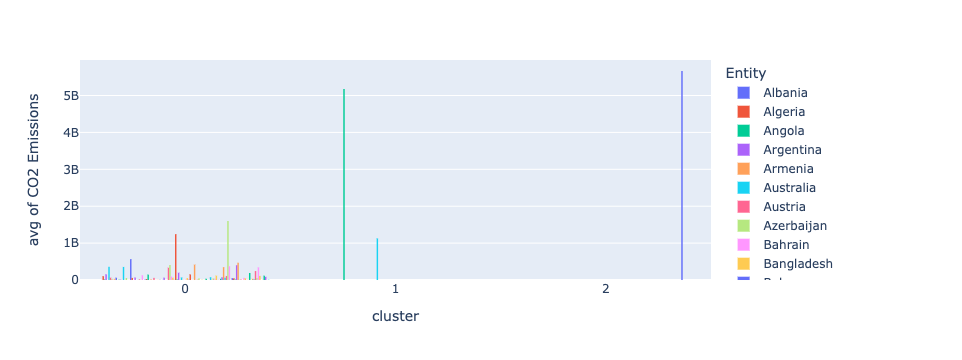

In [136]:
fig = px.histogram(snap, x='cluster', y=snap['CO2 Emissions'], color='Entity', barmode='group', orientation='v', histfunc='avg')
fig.show()

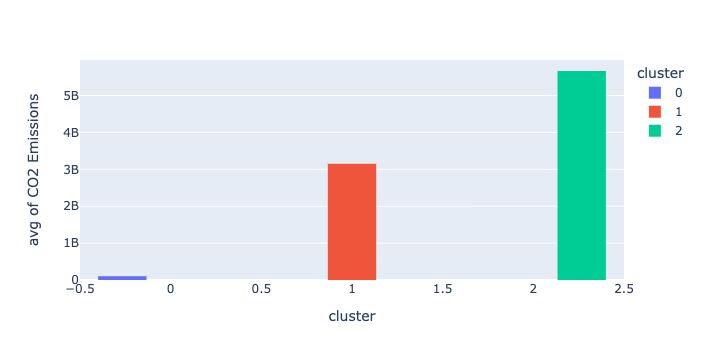

In [224]:
fig = px.histogram(snap, x='cluster', y=snap['CO2 Emissions'], color='cluster', barmode='group', orientation='v', histfunc='avg')
fig.show()

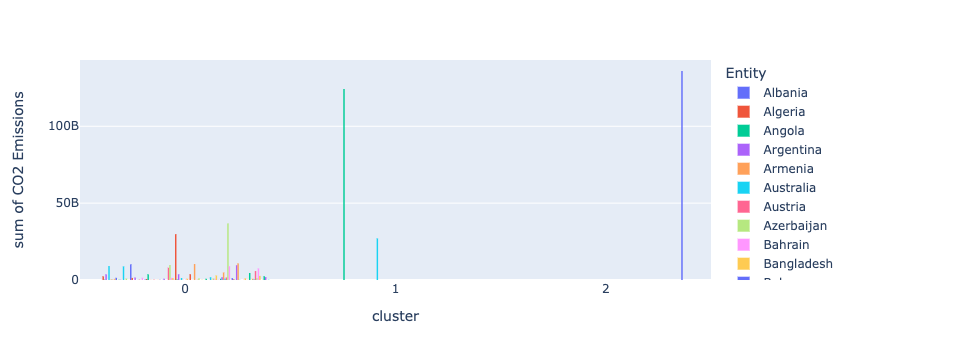

In [137]:
fig = px.histogram(snap, x='cluster', y=snap['CO2 Emissions'], color='Entity', barmode='group')
fig.show()

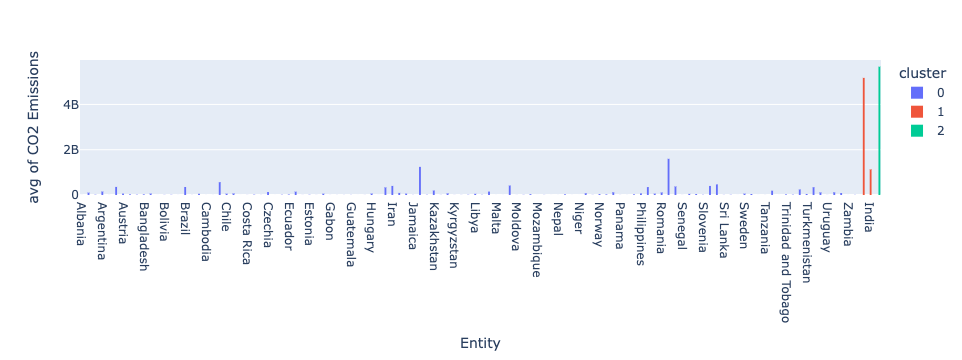

In [138]:
fig = px.histogram(snap, x='Entity', y='CO2 Emissions', color='cluster', barmode='group', histfunc='avg')
fig.show()

In [168]:
snap.sort_values('CO2 Emissions', ascending=False).groupby('Entity').sum()

Year  CO2 Emissions  CO2 Emissions Per Cap       Total GHG  \
Entity                                                                    
Albania     40067       72320032                 23.727   173460000.000   
Algeria     46068     2343259112                 71.699  3220620000.000   
Angola      40082      379183662                 18.269  3527080000.000   
Argentina   48036     3606355644                 95.621  9622260000.000   
Armenia     40090       82917351                 27.850   147130000.000   
...           ...            ...                    ...             ...   
Uruguay     48060      142023871                 42.923   369280000.000   
Uzbekistan  42063     2425577273                 94.623  4518380000.000   
Vietnam     44075     1874236719                 22.036  3264590000.000   
Zambia      50050       64485010                  5.754 11399150000.000   
Zimbabwe    46068      274253489                 22.997  1550810000.000   

            Consumption of Ozone   Urban%  Population        GDP  \
Entity                                                             
Albania                  568.850  914.432    2216.699 151776.412   
Algeria                25858.540 1428.934     314.160 221315.882   
Angola                  1222.290 1078.540     311.949 124934.996   
Argentina              86536.150 2143.925     328.385 465111.931   
Armenia                 1689.160 1283.969    2107.666 139196.918   
...                          ...      ...         ...        ...   
Uruguay                 3534.940 2220.050     452.452 373891.669   
Uzbekistan              1855.060  996.542    1272.192  72800.221   
Vietnam                 9259.670  586.238    5761.735  82984.634   
Zambia                   718.620  942.302     376.931  60375.186   
Zimbabwe                9733.400  758.903     718.654  72039.770   

              Forest area  Deaths %  Child Mortality  Death_rate_all_causes  \
Entity                                                                        
Albania      15549886.000   278.903           45.010                819.798   
Algeria      39939100.000   253.112           82.160               2200.539   
Angola     1499465376.000   244.210          330.770                512.976   
Argentina   782880600.000   116.103           47.090                708.664   
Armenia       6634095.000   259.915           50.860               1836.365   
...                   ...       ...              ...                    ...   
Uruguay      34105750.000    74.780           37.520                430.029   
Uzbekistan   64575768.200   326.039          108.820               3409.588   
Vietnam     268611000.000   343.169           63.330                868.397   
Zambia     1173036200.000   251.440          323.420                659.665   
Zimbabwe    419284780.000   190.536          203.590                769.215   

            Death_under5  Death_5-14  Death_70+  cluster  net_zero_bin  
Entity                                                                  
Albania         1267.751      63.077  14183.926        0             0  
Algeria        32509.431     943.425 173746.776        0             0  
Angola         24731.595     590.308  10035.513        0             0  
Argentina       8305.522     144.808 161302.396        0             0  
Armenia         1459.621      39.170  34859.224        0             0  
...                  ...         ...        ...      ...           ...  
Uruguay          411.415       3.612  12483.920        0            24  
Uzbekistan     52004.173    3005.627 169971.523        0             0  
Vietnam        25918.791     368.992 282740.311        0            22  
Zambia         18274.386     465.748   9055.071        0             0  
Zimbabwe       15033.144     212.545  14360.923        0             0  

[116 rows x 17 columns]

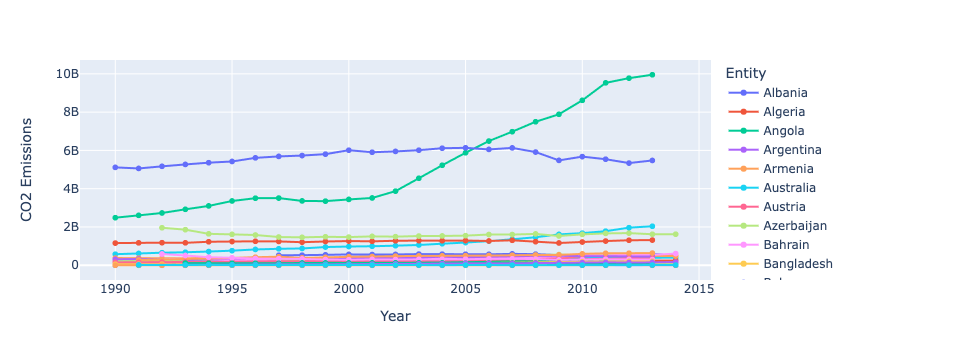

In [152]:
fig = px.line(snap, x='Year', y='CO2 Emissions', color='Entity', markers=True)
fig.show()

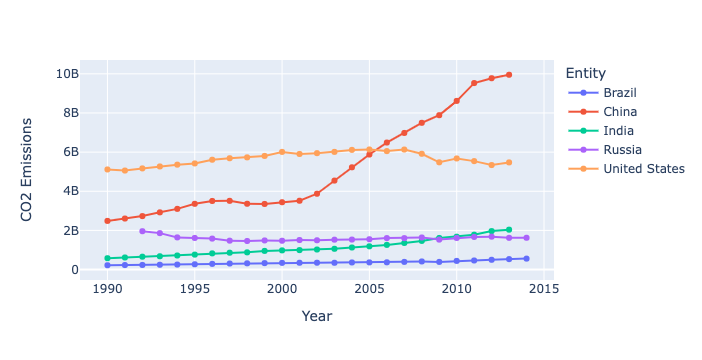

In [202]:
c = ['Brazil', 'India', 'China', 'Russia', 'United States']
fig = px.line(snap[snap['Entity'].isin(c)], x='Year', y='CO2 Emissions', color='Entity',line_group='cluster',markers=True)
fig.show()

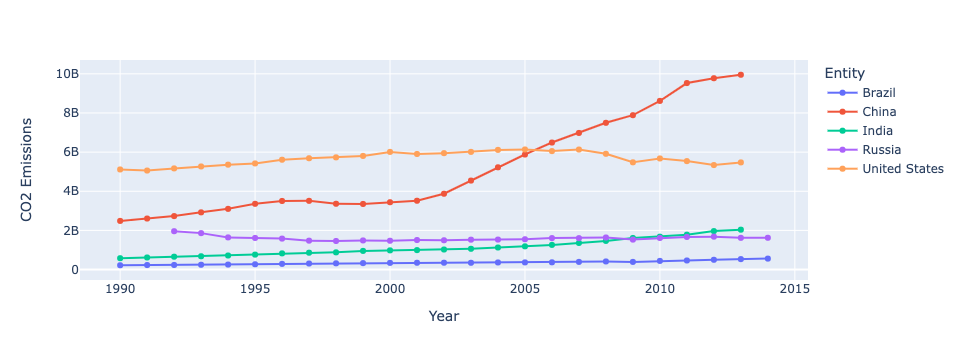

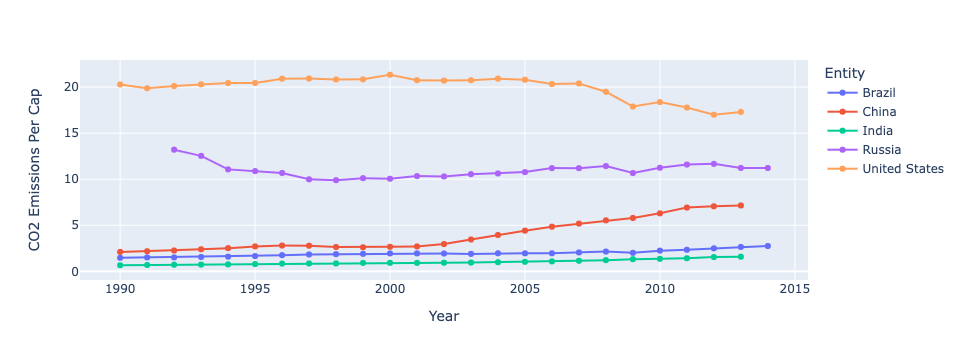

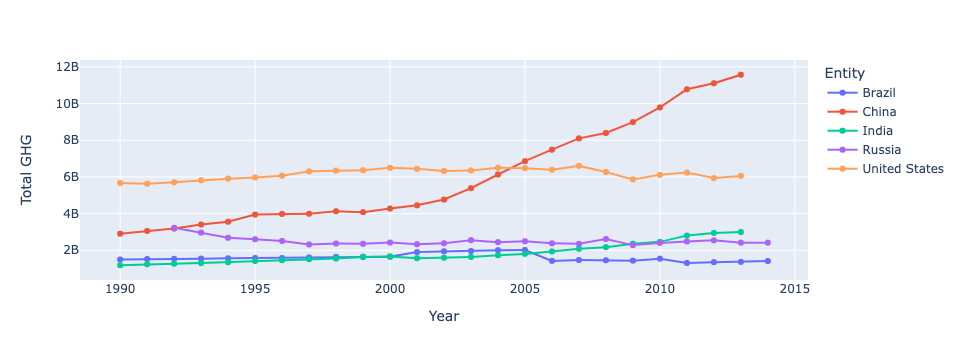

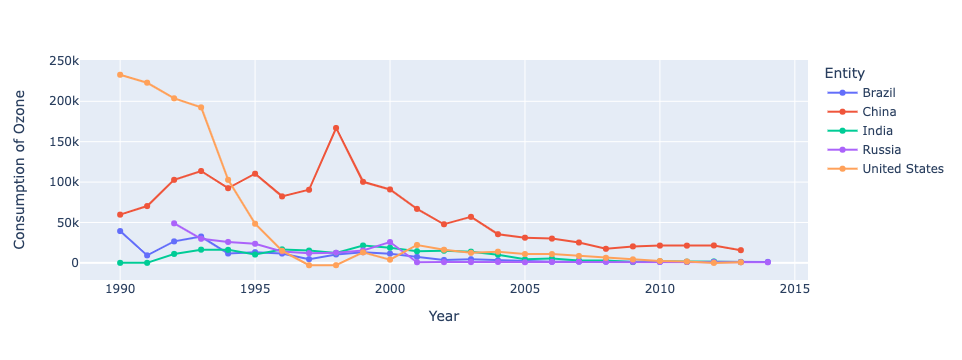

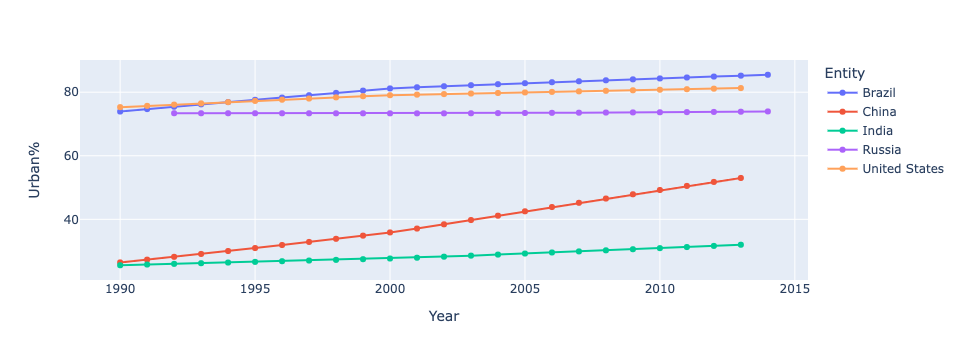

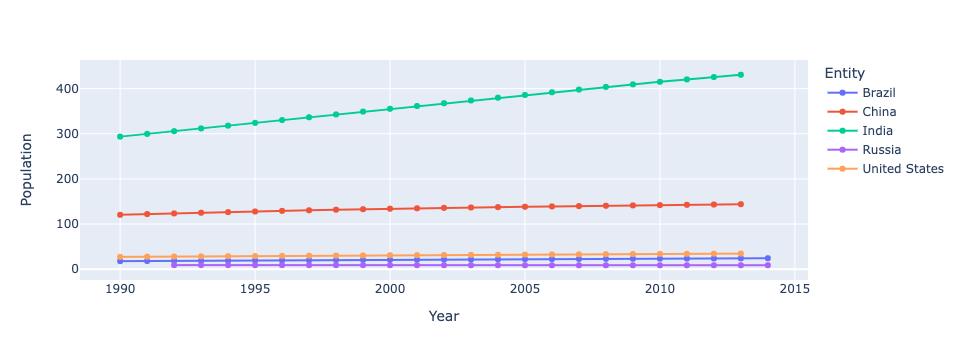

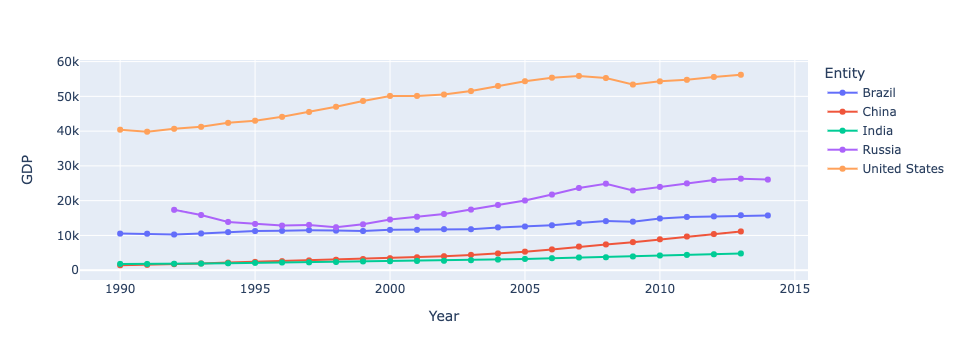

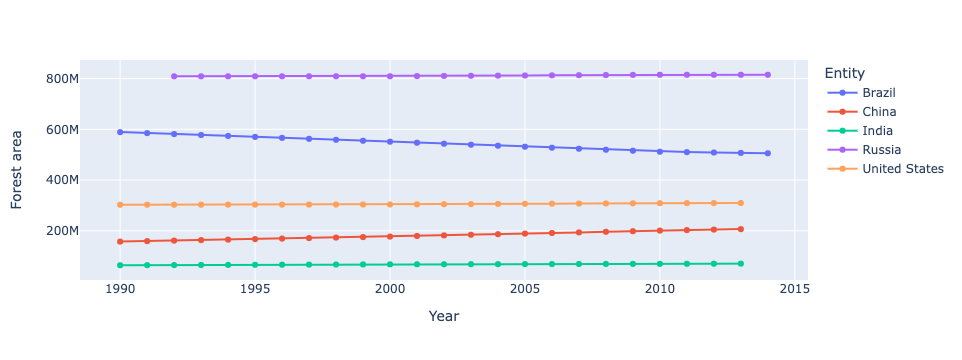

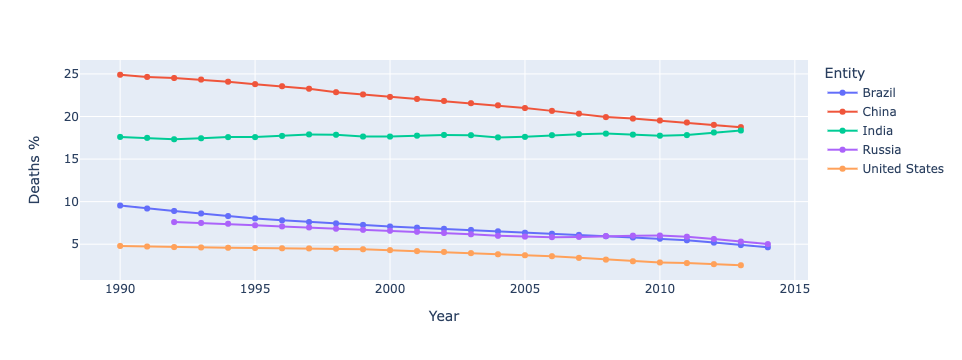

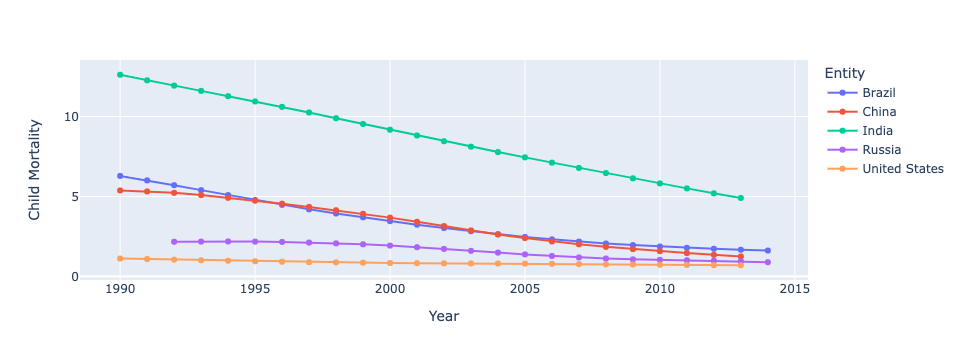

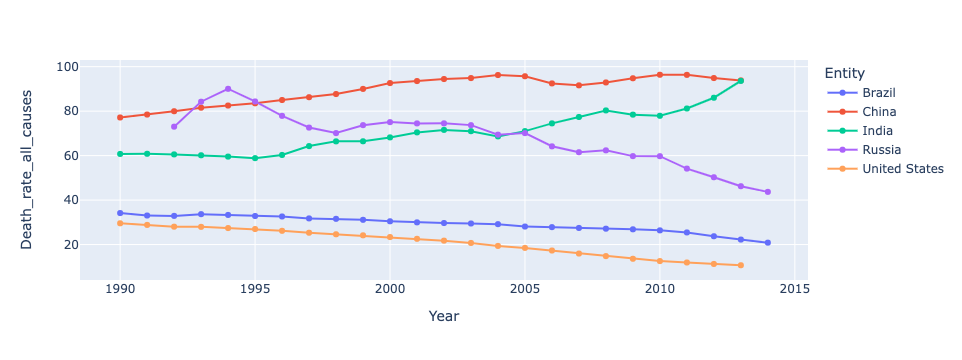

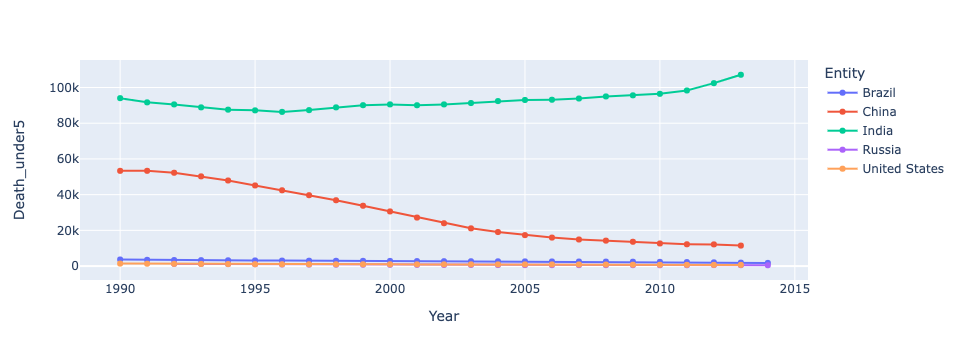

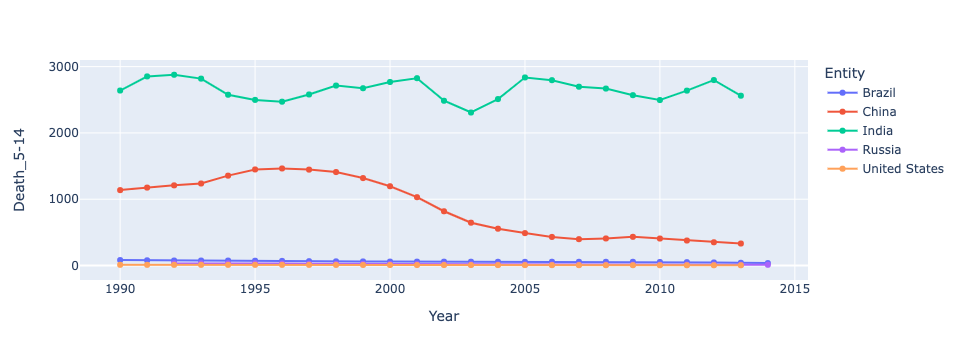

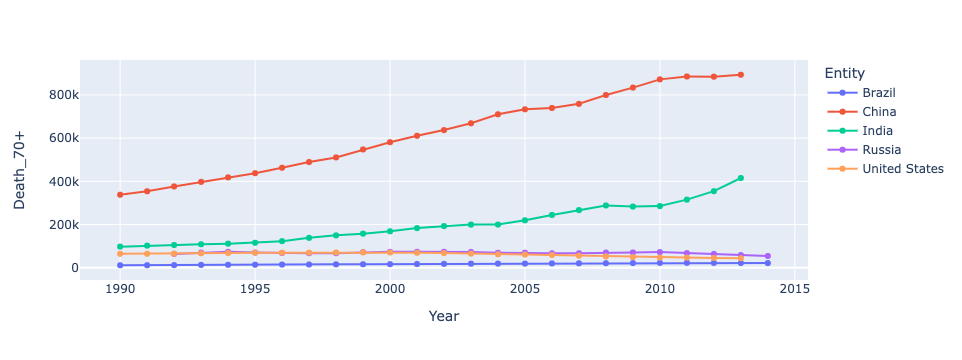

In [204]:
#plot each cluster's snap statistics (1by1) over time (line)

for stat in stats:
    fig = px.line(snap[snap['Entity'].isin(c)], x='Year', y=stat, color='Entity',line_group='cluster',markers=True)
    fig.show()

In [208]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
snap.drop(columns='Year').groupby('cluster').mean().T

cluster                           0              1              2
CO2 Emissions         102877714.826 3149207442.771 5664404257.417
CO2 Emissions Per Cap         5.169          2.464         19.947
Total GHG             195452293.539 3915458541.667 6159869583.333
Consumption of Ozone       1187.150      35517.384      47467.957
Urban%                       58.067         33.545         78.875
Population                  180.856        249.008         31.124
GDP                       15806.941       3911.556      49302.893
Forest area            30985970.730  124395229.562  305191875.000
Deaths %                     10.697         19.831          3.912
Child Mortality               4.473          5.999          0.858
Death_rate_all_causes        55.409         80.021         20.981
Death_under5               1316.642      60912.312        964.144
Death_5-14                   34.251       1765.129          7.433
Death_70+                  4986.685     411923.571      61425.546
net_zero_bin                  0.344          1.000          1.000

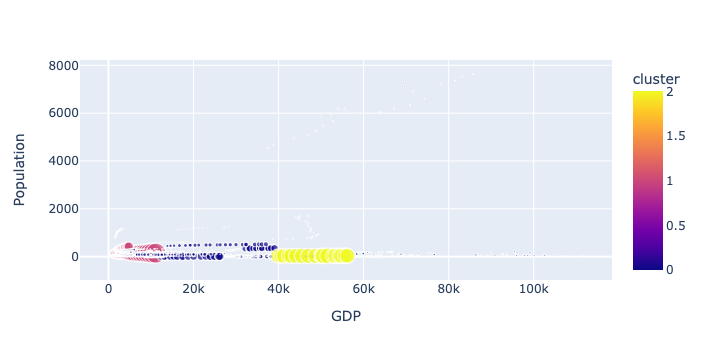

In [228]:
#scatter plots
fig = px.scatter(snap, x='GDP', y='Population', size='CO2 Emissions', color='cluster', hover_name='Entity')
fig.show()

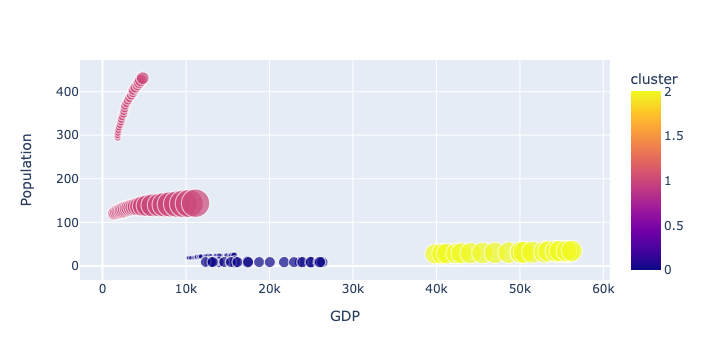

In [229]:
fig = px.scatter(snap[snap['Entity'].isin(c)], x='GDP', y='Population', size='CO2 Emissions', color='cluster', hover_name='Entity')
fig.show()

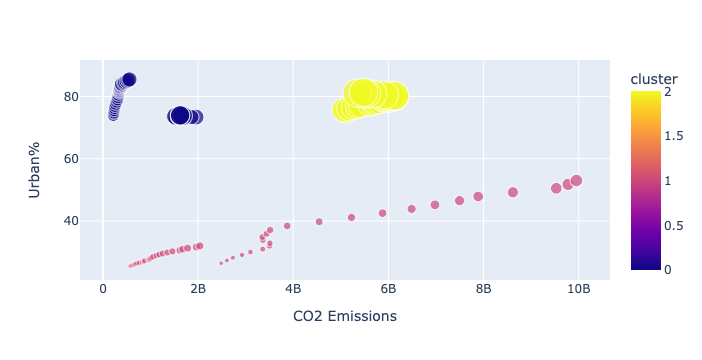

In [232]:
fig = px.scatter(snap[snap['Entity'].isin(c)], x='CO2 Emissions', y='Urban%', size='GDP', color='cluster', hover_name='Entity')
fig.show()

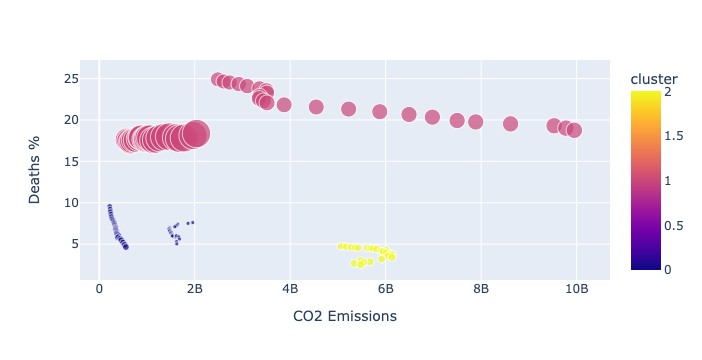

In [236]:
fig = px.scatter(snap[snap['Entity'].isin(c)], x='CO2 Emissions', y='Deaths %', size='Population', color='cluster', hover_name='Entity')
fig.show()

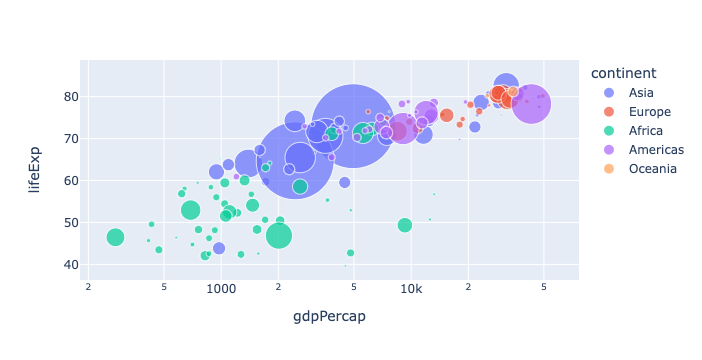

In [205]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), 
                 x="gdpPercap", 
                 y="lifeExp",
                 size="pop", 
                 color="continent",
                 hover_name="country", 
                 log_x=True, 
                 size_max=60
)
fig.show()


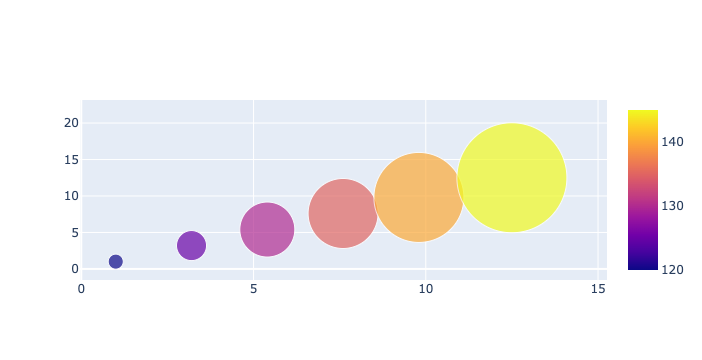

In [206]:
fig = go.Figure(data=[go.Scatter(
    x=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    y=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[15, 30, 55, 70, 90, 110],
        showscale=True
        )
)])

fig.show()